In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Load the data
df = pd.read_csv('/content/USA_Housing.csv')

In [4]:
# Display basic information
print("Dataset shape:", df.shape)

Dataset shape: (5000, 7)


In [5]:
print("\nFirst few rows:")
df.head()


First few rows:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
print("\nBasic statistics:")
df.describe()


Basic statistics:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
le = LabelEncoder()
df["Address"] = le.fit_transform(df["Address"])
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4736
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,4750
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,4636
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,1897
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,4833


In [9]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734,-0.000479
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543,-0.007904
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664,0.012017
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071,0.021650
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556,0.019739
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000,0.008710
Address,-0.000479,-0.007904,0.012017,0.021650,0.019739,0.008710,1.000000


In [10]:
# Prepare features and target
# Drop 'Address' column as it's not useful for prediction
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

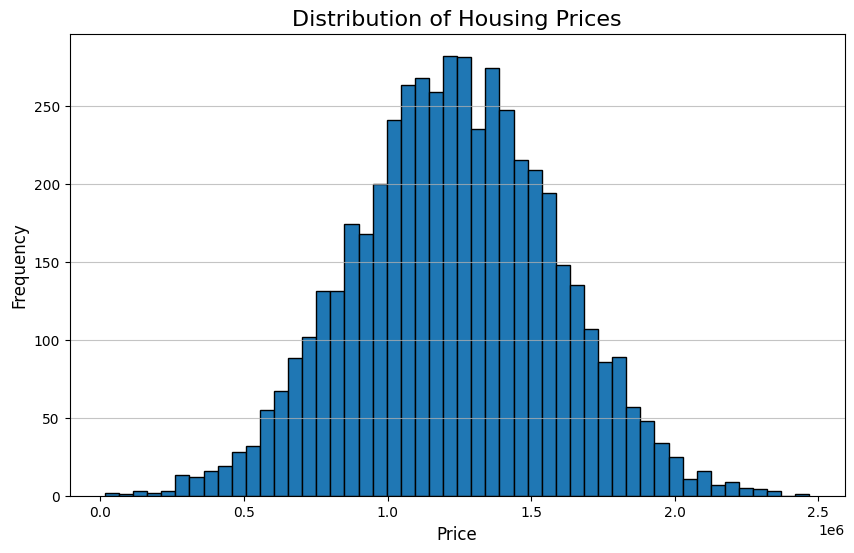

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=50, edgecolor='black')
plt.title('Distribution of Housing Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

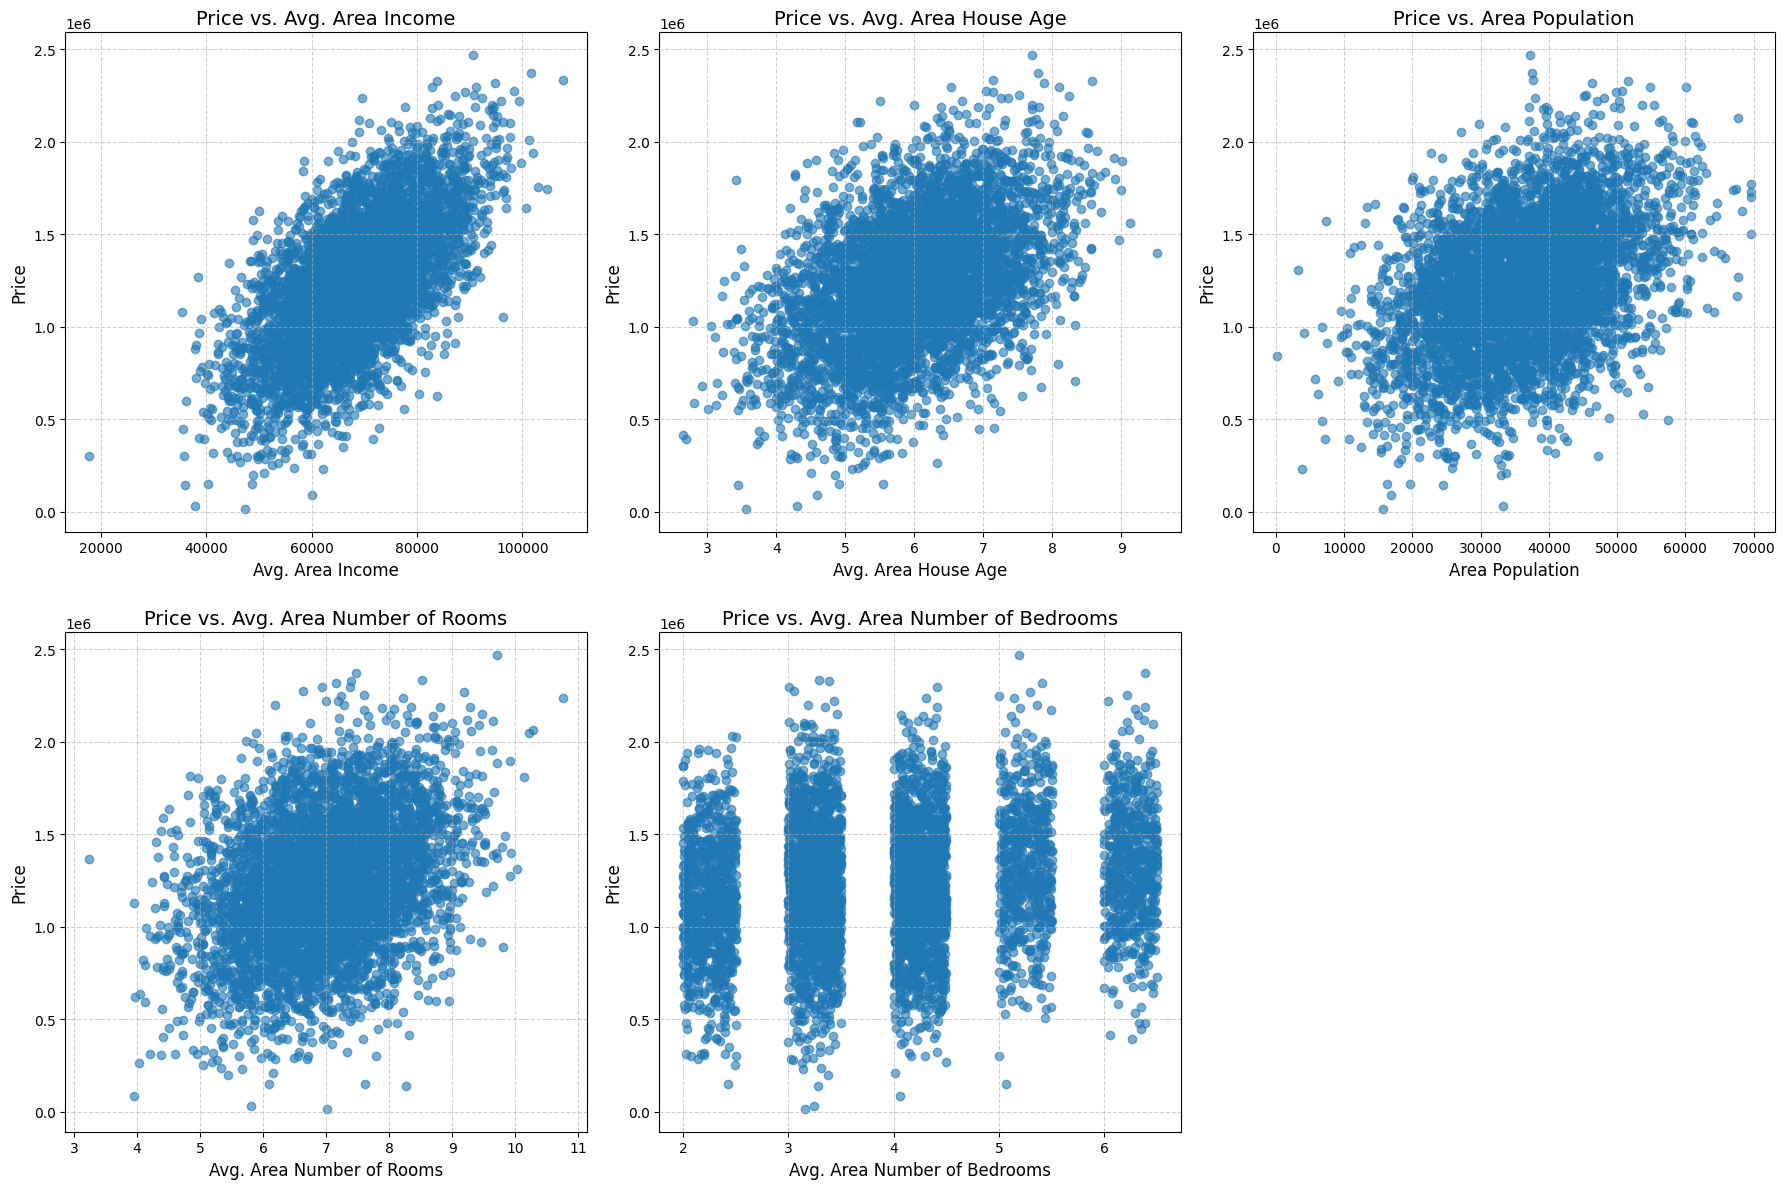

In [36]:
features = ['Avg. Area Income', 'Avg. Area House Age', 'Area Population',
            'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['Price'], alpha=0.6)
    axes[i].set_title(f'Price vs. {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Price', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Hide any unused subplots if the number of features is less than the grid size
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [11]:
print("\n" + "="*50)
print("FEATURES USED FOR PREDICTION:")
print("="*50)
print(X.columns.tolist())


FEATURES USED FOR PREDICTION:
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']


In [12]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 4000
Testing set size: 1000


In [13]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [14]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [16]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)


In [17]:
# Evaluate the model
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

print("mse = ",mse_scaled,"rmse = ",rmse_scaled,"r2 = ",r2_scaled)

mse =  0.08068325778109704 rmse =  0.2840479849974244 r2 =  0.9179971706834331


In [18]:
# Display feature importance (coefficients)
print("\n" + "="*50)
print("FEATURE COEFFICIENTS:")
print("="*50)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(feature_importance)


FEATURE COEFFICIENTS:
                        Feature  Coefficient
0              Avg. Area Income     0.655348
1           Avg. Area House Age     0.462594
4               Area Population     0.430511
2     Avg. Area Number of Rooms     0.341400
3  Avg. Area Number of Bedrooms     0.008462


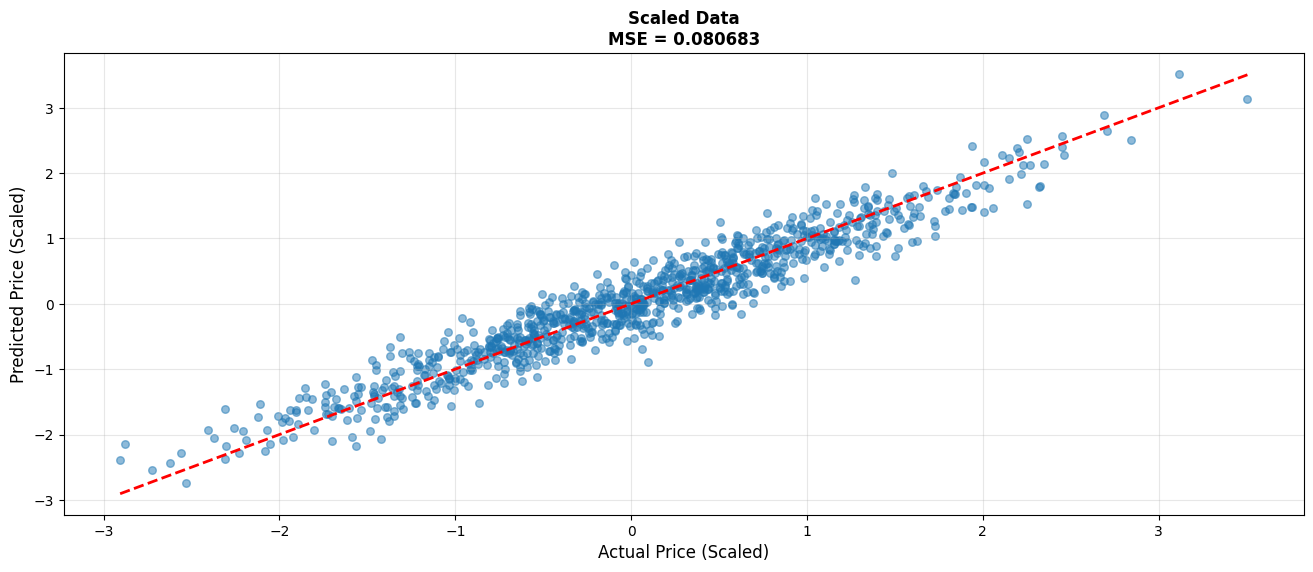

In [19]:
fig, axes = plt.subplots(1, figsize=(16, 6))
# Plot 1: Scaled predictions
axes.scatter(y_test_scaled, y_pred_scaled, alpha=0.5, s=30)
axes.plot([y_test_scaled.min(), y_test_scaled.max()],
             [y_test_scaled.min(), y_test_scaled.max()], 'r--', lw=2)
axes.set_xlabel('Actual Price (Scaled)', fontsize=12)
axes.set_ylabel('Predicted Price (Scaled)', fontsize=12)
axes.set_title(f'Scaled Data\nMSE = {mse_scaled:.6f}', fontsize=12, fontweight='bold')
axes.grid(True, alpha=0.3)

In [27]:
# Initialize and train RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train_scaled)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [28]:
y_pred_rf_scaled = model_rf.predict(X_test_scaled)
print("Predictions made successfully using RandomForestRegressor.")

Predictions made successfully using RandomForestRegressor.


In [29]:
# Evaluate the RandomForestRegressor model
mse_rf_scaled = mean_squared_error(y_test_scaled, y_pred_rf_scaled)
rmse_rf_scaled = np.sqrt(mse_rf_scaled)
r2_rf_scaled = r2_score(y_test_scaled, y_pred_rf_scaled)

print(f"RandomForestRegressor MSE (Scaled): {mse_rf_scaled:.6f}")
print(f"RandomForestRegressor RMSE (Scaled): {rmse_rf_scaled:.6f}")
print(f"RandomForestRegressor R2 Score (Scaled): {r2_rf_scaled:.6f}")

RandomForestRegressor MSE (Scaled): 0.115317
RandomForestRegressor RMSE (Scaled): 0.339584
RandomForestRegressor R2 Score (Scaled): 0.882797


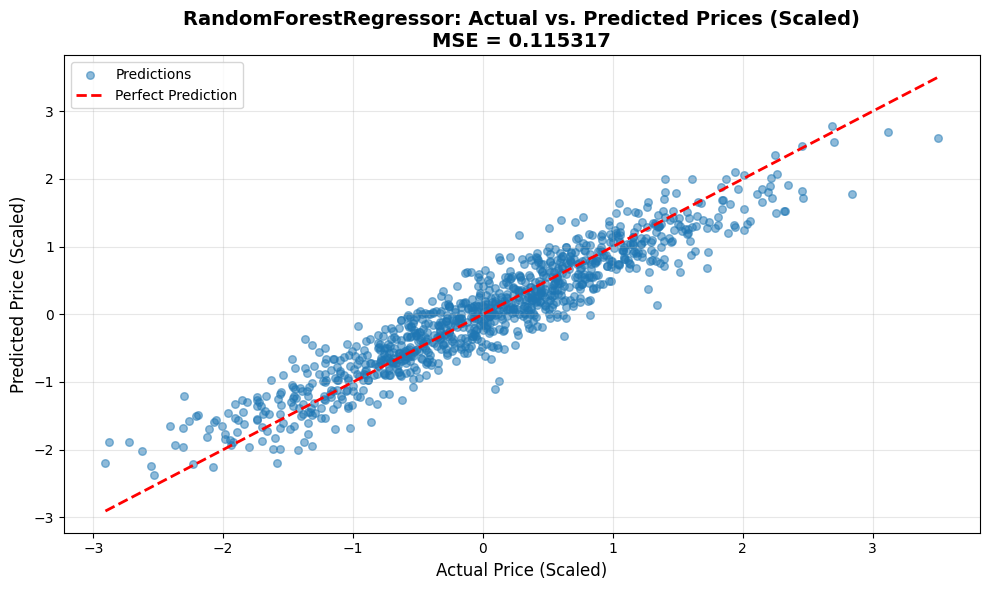

In [30]:
fig_rf, ax_rf = plt.subplots(1, figsize=(10, 6))
ax_rf.scatter(y_test_scaled, y_pred_rf_scaled, alpha=0.5, s=30, label='Predictions')
ax_rf.plot([y_test_scaled.min(), y_test_scaled.max()],
             [y_test_scaled.min(), y_test_scaled.max()], 'r--', lw=2, label='Perfect Prediction')
ax_rf.set_xlabel('Actual Price (Scaled)', fontsize=12)
ax_rf.set_ylabel('Predicted Price (Scaled)', fontsize=12)
ax_rf.set_title(f'RandomForestRegressor: Actual vs. Predicted Prices (Scaled)\nMSE = {mse_rf_scaled:.6f}', fontsize=14, fontweight='bold')
ax_rf.grid(True, alpha=0.3)
ax_rf.legend()
plt.tight_layout()
plt.show()

### Model Performance Comparison

We have evaluated two regression models for predicting housing prices:
1. **Linear Regression**
2. **Random Forest Regressor**

Below is a comparison of their performance metrics on the scaled test data:

| Metric              | Linear Regression | Random Forest Regressor |
|---------------------|-------------------|-------------------------|
| **Mean Squared Error (MSE)** | 0.080683          | 0.115317                |
| **Root Mean Squared Error (RMSE)** | 0.284048          | 0.339584                |
| **R-squared (R2) Score** | 0.917997          | 0.882797                |

**Analysis:**

*   **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)**: These metrics measure the average magnitude of the errors. A lower value indicates a better fit. In this case, the **Linear Regression** model has a lower MSE and RMSE (0.080683 and 0.284048 respectively) compared to the Random Forest Regressor (0.115317 and 0.339584). This suggests that Linear Regression generally made smaller errors in its predictions.

*   **R-squared (R2) Score**: This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 score closer to 1 indicates a better fit. The **Linear Regression** model achieved a higher R2 score (0.917997) than the Random Forest Regressor (0.882797). This indicates that the Linear Regression model explains a greater proportion of the variance in housing prices.

**Conclusion:**

Based on these metrics, the **Linear Regression** model appears to perform better than the Random Forest Regressor for this particular dataset, exhibiting lower error rates and a higher explanatory power (R2 score).